In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#creating new array with same dimension
test = np.arange(12).reshape(3,4)
new_array = np.zeros_like(test)
empty_array = np.empty_like(test)
print new_array
print empty_array

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [23]:
#type conversion
print test.dtype
string_test = test.astype(np.string0)
print string_test

int64
[['0' '1' '2' '3']
 ['4' '5' '6' '7']
 ['8' '9' '10' '11']]


In [30]:
#the slice of numpy array is just a view not a hard copy
test = np.arange(12)
print test
view_test = test[5:8]
view_test[2] = 100
print test
#use test.copy() to get a true copy

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[  0   1   2   3   4   5   6 100   8   9  10  11]


array([  0,   1,   2,   3,   4,   5,   6, 100,   8,   9,  10,  11])

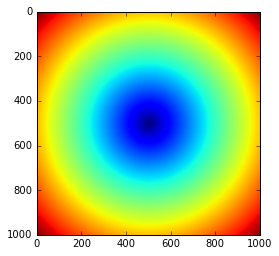

In [35]:
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)
z = np.sqrt(xs**2 + ys**2)
plt.imshow(z)

In [40]:
#np.where
test = np.arange(12)
#location
np.where(test>=5)
#replacement
print np.where(test>=5, test, test+100)
print np.where(test>=5, 1, -1)

[100 101 102 103 104   5   6   7   8   9  10  11]
[-1 -1 -1 -1 -1  1  1  1  1  1  1  1]


In [44]:
#find position with max/min values
test = np.random.randn(5,3)
test.argmax(axis=0)

array([4, 2, 0])

In [58]:
#broadcasting
frame = pd.DataFrame(np.arange(12).reshape(3,4))
vector1 =frame.ix[1]
vector2 =frame.ix[:,1]

#broadcasting by row (default)
print frame - vector1

#broadcasting by columns need to use ariithmetric methods
print frame.sub(vector2, axis=0)

   0  1  2  3
0 -4 -4 -4 -4
1  0  0  0  0
2  4  4  4  4
   0  1  2  3
0 -1  0  1  2
1 -1  0  1  2
2 -1  0  1  2


In [63]:
#elementwise apply in DataFrame
frame.applymap(lambda x:x**2)

,0,1,2,3
0,0,1,4,9
1,16,25,36,49
2,64,81,100,121


In [67]:
#descritive statistics
#percentage change
print frame.pct_change()
#diff
print frame.diff()
#isin
print frame.isin([2,3,4])

          0    1         2         3
0       NaN  NaN       NaN       NaN
1       inf  4.0  2.000000  1.333333
2  1.000000  0.8  0.666667  0.571429
     0    1    2    3
0  NaN  NaN  NaN  NaN
1  4.0  4.0  4.0  4.0
2  4.0  4.0  4.0  4.0
       0      1      2      3
0  False  False   True   True
1   True  False  False  False
2  False  False  False  False


In [79]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,-1.732507,-1.076135,0.033202,-1.378888
1,-0.576020,-0.134967,0.194792,-0.123729
2,-1.583858,0.205175,-0.437223,-0.361780
3,-1.008201,-0.794932,NaN,1.370608
4,-0.026508,-0.023007,NaN,-0.307364


In [84]:
#remove duplicate
frame.drop_duplicates()

#bin
pd.cut(np.arange(12), 3, labels=['one', 'two', 'three'])
pd.qcut(np.arange(50),[0,0.1,0.5,0.9,1])

[[0, 4.9], [0, 4.9], [0, 4.9], [0, 4.9], [0, 4.9], ..., (44.1, 49], (44.1, 49], (44.1, 49], (44.1, 49], (44.1, 49]]
Length: 50
Categories (4, object): [[0, 4.9] < (4.9, 24.5] < (24.5, 44.1] < (44.1, 49]]

## Advanced Numpy Topics

In [90]:
arr = np.arange(12).reshape(3,4)
#default is row based
print arr.flatten()

#use column based
#F stands for FORTAN
print arr.flatten('F')

arr2 = np.random.randn(3,4)
#stacked by row
np.r_[arr, arr2]
#stacked by col
np.c_[arr, arr2]

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  4  8  1  5  9  2  6 10  3  7 11]


array([[  0.        ,   1.        ,   2.        ,   3.        ,
         -0.08268831,   0.04099998,   0.69958746,  -0.13922573],
       [  4.        ,   5.        ,   6.        ,   7.        ,
          0.19467965,  -0.95914664,   0.19661832,  -0.02401702],
       [  8.        ,   9.        ,  10.        ,  11.        ,
          1.05006735,  -0.20235604,  -0.83043439,   2.21246408]])

In [22]:
import numpy as np

x = np.arange(9).reshape((3,3))
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [26]:
str(x.data)

'\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x06\x00\x00\x00\x00\x00\x00\x00\x07\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00'

In [27]:
x.dtype=np.int8
str(x.data)

'\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x06\x00\x00\x00\x00\x00\x00\x00\x07\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00'